<a href="https://colab.research.google.com/github/chaeeuen/python-machine-learing/blob/main/3_22_ESAA_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 전처리

1. 데이터 인코딩

1) 레이블 인코딩 : 카테고리 피처를 코드형 숫자값으로 변환하는 것

-> LabelEncoder 클래스

: 특정 ML 알고리즘에서는 숫자의 크기별로 가중치 부여되기도 함

-> 선형회귀와 같은 ML 알고리즘에는 적용되지 않아야

-> 트리계열 ML 알고리즘은 숫자의 이러한 특성을 반영하지 않아 문제되지 않음


In [3]:
from sklearn.preprocessing import LabelEncoder
items =['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print('인코딩 변환값:', encoder.classes_)

인코딩 변환값: ['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']


In [4]:
print('디코딩 원본값:', encoder.inverse_transform([4,5,2,0,1,1,3,3]))

디코딩 원본값: ['전자레인지' '컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']


2) 원-핫 인코딩

-> OneHotEncoder

: 레이블 인코딩이 숫자값에 가중치를 부여하는 문제점을 해결하기 위한 방식

: 피처값의 유형에 따라 새로운 피처를 추가해 고유 값에 해당하는 칼럼에만 1을 표시하고 나머지 칼럼에는 0을 표시하는 방식

: 행 형태로 되어잇는 피처의 고유 값을 열 형태로 차원을 변환한 뒤, 고유값에 해당하는 칼럼에만 1을 표시하고 나머지 칼럼에는 0 표시

In [5]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np
items =['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']
encoder = LabelEncoder()
encoder.fit(items)
labels=encoder.transform(items)

labels=labels.reshape(-1,1)

oh_encoder = OneHotEncoder()
oh_encoder.fit(labels)
oh_labels = oh_encoder.transform(labels)
print('원-핫 인코딩 데이터')
print(oh_labels.toarray())
print('원-핫 인코딩 데이터 차원')
print(oh_labels.shape)

원-핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원-핫 인코딩 데이터 차원
(8, 6)


In [6]:
#get_dummies() 를 이용해 더 쉽게 인코딩 가능
import pandas as pd
df= pd.DataFrame({'item':['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']})
pd.get_dummies(df)

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자레인지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


3) 피처 스케일링과 정규화

: 표준화(~(0,1)로 변환)와 정규화(개별 데이터의 크기를 모두 똑같은 단위로 변경)

-> StandardScaler, MinMaxScaler

- StandardScaler
 : 표준화를 쉽게 지원하기 위한 클래스

 : 개별 피처를 평균이 0이고 분산이 1인 값으로 변환해줌

 : 사이킷런에서 구현한 RBF 커널을 이용하는 서포트 벡터 머신, 선형회귀, 로지스틱 회귀는 데이터가 가우시안 분포를 가지고 있다고 가정하고 구현됐기 때문에 사전에 표준화를 적용하는 것은 예측 성능 향상에 매우 중요한 요소


In [7]:
from sklearn.datasets import load_iris
import pandas as pd

iris=load_iris()
iris_data=iris.data
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)

print('feature들의 평균값')
print(iris_df.mean())
print('\nfeature들의 분산값')
print(iris_df.var())

feature들의 평균값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature들의 분산값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [8]:
from sklearn.preprocessing import StandardScaler

#StandardScaler 객체 생성
scaler = StandardScaler()
#StandardScaler로 데이터 세트 변환. Fit()과 transform()호출
scaler.fit(iris_df)
iris_scaled=scaler.transform(iris_df)

#transform()시 스케일 변환된 데이터 세트가 Numpy ndarray로 반환돼 데이터프레임으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature들의 평균값')
print(iris_df_scaled.mean())
print('\nfeature들의 분산값')
print(iris_df_scaled.var())

feature들의 평균값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature들의 분산값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


2) MinMaxScaler

: 데이터 값을 0과 1사이의 범위 값으로 변환(음수값이 있으면 -1에서 1값으로 변환)

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
scaler.fit(iris_df)
iris_scales=scaler.transform(iris_df)

iris_df_scaled=pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature들의 최솟값')
print(iris_df_scaled.min())
print('\nfeature들의 최댓값')
print(iris_df_scaled.max())

feature들의 최솟값
sepal length (cm)   -1.870024
sepal width (cm)    -2.433947
petal length (cm)   -1.567576
petal width (cm)    -1.447076
dtype: float64

feature들의 최댓값
sepal length (cm)    2.492019
sepal width (cm)     3.090775
petal length (cm)    1.785832
petal width (cm)     1.712096
dtype: float64


3) 학습 데이터와 테스트 데이터의 스케일링 변환시 유의점

: StandardScaler나 MinMaxSclaer와 같은 Scaler객체를 이용해 데이터의 스케일링 변환시 fit(), transform(), fit_transform()메소드 이용

- fit() : 데이터 변환을 위한 기준 정보 설정

- transform() : 설정된 정보를 이용해 데이터변환

- fit_transform() : fit 과 transform 을 한번에 적용

In [10]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

train_array = np.arange(0,11).reshape(-1,1)
test_array = np.arange(0,6).reshape(-1,1)

scaler=MinMaxScaler()

scaler.fit(train_array)
train_scaled=scaler.transform(train_array)

print('원본 train_array 데이터 :', np.round(train_array.reshape(-1),2))

print('Scale된 train_array 데이터 :', np.round(train_scaled.reshape(-1),2))

원본 train_array 데이터 : [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터 : [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [11]:
scaler.fit(test_array)
test_scaled=scaler.transform(test_array)

print('원본 test_array 데이터:', np.round(test_array.reshape(-1),2))
print('scale된 test_array 데이터:', np.round(test_scaled.reshape(-1),2))

원본 test_array 데이터: [0 1 2 3 4 5]
scale된 test_array 데이터: [0.  0.2 0.4 0.6 0.8 1. ]


In [12]:
scaler=MinMaxScaler()

scaler.fit(train_array)
train_scaled=scaler.transform(train_array)

print('원본 train_array 데이터 :', np.round(train_array.reshape(-1),2))

print('Scale된 train_array 데이터 :', np.round(train_scaled.reshape(-1),2))

#test_array에 scale 변환을 할 떄는 반드시 fit()을 호출하지 않고 Transform만으로 변환해야함
test_scaled = scaler.transform(test_array)
print('\n원본 test_array 데이터:', np.round(test_array.reshape(-1),2))
print('scale된 test_array 데이터:', np.round(train_array.reshape(-1),2))

원본 train_array 데이터 : [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터 : [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]

원본 test_array 데이터: [0 1 2 3 4 5]
scale된 test_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]


# 6. 사이킷런으로 수행하는 타이타닉 생존자 예측

In [13]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
titanic_df = pd.read_csv("/content/drive/MyDrive/train.csv")

Mounted at /content/drive


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
titanic_df = pd.read_csv("/content/drive/MyDrive/train.csv")
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [15]:
print('\n ### 학습 데이터 정보 \n')
print(titanic_df.info())


 ### 학습 데이터 정보 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [16]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N',inplace=True)

In [17]:
print('Sex 값 분포 :\n', titanic_df['Sex'].value_counts())
print('\n Cabin 값 분포 :\n', titanic_df['Cabin'].value_counts())
print('\n Embarked 값 분포 :\n', titanic_df['Embarked'].value_counts())

Sex 값 분포 :
 male      577
female    314
Name: Sex, dtype: int64

 Cabin 값 분포 :
 N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

 Embarked 값 분포 :
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [18]:
titanic_df['Cabin']=titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


In [19]:
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<Axes: xlabel='Sex', ylabel='Survived'>

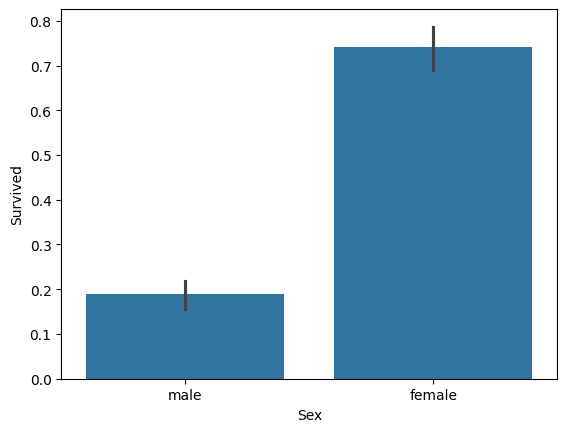

In [20]:
sns.barplot(x='Sex', y='Survived', data=titanic_df)

<Axes: xlabel='Pclass', ylabel='Survived'>

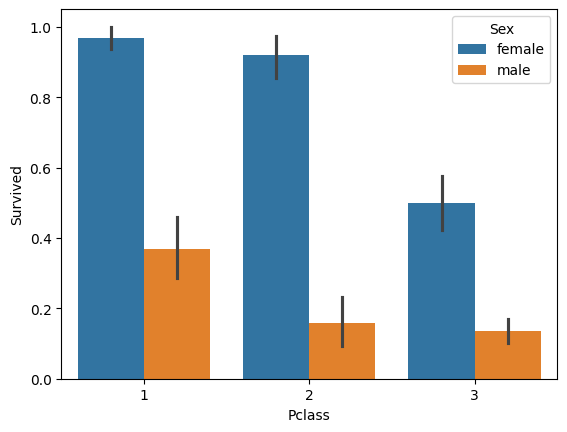

In [21]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)

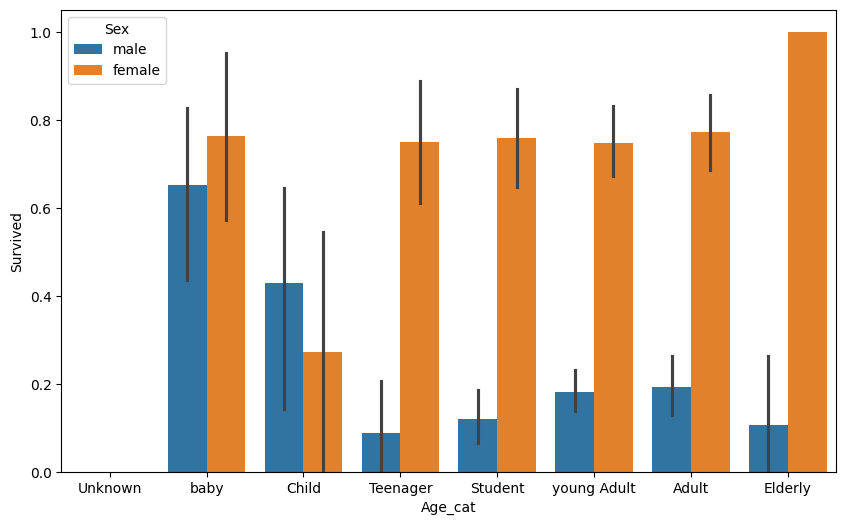

In [22]:
def get_category(age):
  cat=''
  if age <= -1 : cat='Unknown'
  elif age <= 5 : cat='baby'
  elif age <= 12 : cat='Child'
  elif age <= 18 : cat='Teenager'
  elif age <= 25 : cat='Student'
  elif age <= 35 : cat='young Adult'
  elif age <= 60 : cat='Adult'
  else : cat ='Elderly'

  return cat

plt.figure(figsize=(10,6))

group_names = ['Unknown', 'baby', 'Child', 'Teenager', 'Student', 'young Adult', 'Adult', 'Elderly']

titanic_df['Age_cat']= titanic_df['Age'].apply(lambda x : get_category(x))
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=titanic_df, order=group_names)
titanic_df.drop('Age_cat', axis=1, inplace=True)

In [23]:
from sklearn import preprocessing
def encode_features(dataDF):
  features = ['Cabin', 'Sex', 'Embarked']
  for feature in features:
    le = preprocessing.LabelEncoder()
    le = le.fit(dataDF[feature])
    dataDF[feature] = le.transform(dataDF[feature])

    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,7,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,2,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,7,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,2,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,7,S


In [66]:
from sklearn.preprocessing import LabelEncoder
#NULL 처리함수
def fillna(df):
  df['Age'].fillna(df['Age'].mean(), inplace=True)
  df['Cabin'].fillna('N', inplace=True)
  df['Embarked'].fillna('N', inplace=True)
  df['Fare'].fillna(0,inplace=True)
  return df

def drop_features(df):
  df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
  return df

def format_features(df):
  df['Cabin']=df['Cabin'].str[:1]
  features=['Cabin', 'Sex', 'Embarked']
  for feature in features:
    le=LabelEncoder()
    le=le.fit(df[feature])
    df[feature]=le.transform(df[feature])
  return df

def transform_features(df):
  df=fillna(df)
  df=drop_features(df)
  df=format_features(df)
  return df

#원본 데이터를 재로딩하고, 피처 데이터 세트와 레이블 데이터 세트 추출
titanic_df = pd.read_csv('/content/drive/MyDrive/train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived',axis=1)

X_titanic_df = transform_features(X_titanic_df)

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_titanic_df, y_titanic_df, \
                                                  test_size=0.2, random_state=11)

In [68]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression(solver='liblinear')


# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train , y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train , y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train , y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

DecisionTreeClassifier 정확도: 0.7877
RandomForestClassifier 정확도:0.8547
LogisticRegression 정확도: 0.8659
